# **PROJECT INTRODUCTION**

**Convolutional Neural Network = Klasifikasi Tomat Mentah dan Matang**


**DECRIPTION** : Program ini bertujuan untuk membangun model Convolutional Neural Network (CNN) yang dapat melakukan klasifikasi terhadap tomat Mentah dan tomat Matang. Didalam model ini digunakan arsitektur Mobilenet v2. Pengembangan lebih lanjut ::<br>
1. Integrasi dengan IoT untuk automatisasi proses sortir HASIL PANEN tomat antara tomat matang dan mentah
2. Integrasi dengan IoT untuk memantau tingkat kematangan tomat di sistem smart agriculture

---


**REFERENCE (SOURCE CODE)**:<br>
1. https://datascience.stackexchange.com/questions/48390/how-do-i-build-an-image-dataset-for-cnn
2. https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/
3. https://stackoverflow.com/questions/45969390/difference-between-stratifiedkfold-and-stratifiedshufflesplit-in-sklearn
4. https://www.tensorflow.org/tutorials/images/classification
5. https://alamehan.github.io/

# **1. PRAPROSES DATASET**

**1-1. LOAD DATA**

**Opsi 1**

In [4]:
!pip install gdown


In [5]:
import gdown
url = 'https://drive.google.com/uc?id=1bTV6rAbs0ujhfJa-9d1pl0qJNx4jESrx'
gdown.download(url, 'tomato_dataset.zip', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1bTV6rAbs0ujhfJa-9d1pl0qJNx4jESrx
From (redirected): https://drive.google.com/uc?id=1bTV6rAbs0ujhfJa-9d1pl0qJNx4jESrx&confirm=t&uuid=c60e1b4b-661e-4dca-b85c-196298ab8237
To: /content/tomato_dataset.zip
100%|██████████| 45.9M/45.9M [00:01<00:00, 35.9MB/s]


'tomato_dataset.zip'

In [6]:

!unzip /content/tomato_dataset.zip

Archive:  /content/tomato_dataset.zip
   creating: omao_dataset/train/
   creating: omao_dataset/train/Ripe/
  inflating: omao_dataset/train/Ripe/r (1).jpg  
  inflating: omao_dataset/train/Ripe/r (1000).jpg  
  inflating: omao_dataset/train/Ripe/r (1001).jpg  
  inflating: omao_dataset/train/Ripe/r (1002).jpg  
  inflating: omao_dataset/train/Ripe/r (1003).jpg  
  inflating: omao_dataset/train/Ripe/r (1004).jpg  
  inflating: omao_dataset/train/Ripe/r (1005).jpg  
  inflating: omao_dataset/train/Ripe/r (1006).jpg  
  inflating: omao_dataset/train/Ripe/r (1007).jpg  
  inflating: omao_dataset/train/Ripe/r (1008).jpg  
  inflating: omao_dataset/train/Ripe/r (1009).jpg  
  inflating: omao_dataset/train/Ripe/r (1011).jpg  
  inflating: omao_dataset/train/Ripe/r (1012).jpg  
  inflating: omao_dataset/train/Ripe/r (1013).jpg  
  inflating: omao_dataset/train/Ripe/r (1014).jpg  
  inflating: omao_dataset/train/Ripe/r (1015).jpg  
  inflating: omao_dataset/train/Ripe/r (1016).jpg  
  inflatin

**Opsi2**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

!unzip /content/drive/MyDrive/tomato_dataset.zip


Archive:  /content/drive/MyDrive/tomato_dataset.zip
   creating: omao_dataset/train/
   creating: omao_dataset/train/Ripe/
  inflating: omao_dataset/train/Ripe/r (1).jpg  
  inflating: omao_dataset/train/Ripe/r (1000).jpg  
  inflating: omao_dataset/train/Ripe/r (1001).jpg  
  inflating: omao_dataset/train/Ripe/r (1002).jpg  
  inflating: omao_dataset/train/Ripe/r (1003).jpg  
  inflating: omao_dataset/train/Ripe/r (1004).jpg  
  inflating: omao_dataset/train/Ripe/r (1005).jpg  
  inflating: omao_dataset/train/Ripe/r (1006).jpg  
  inflating: omao_dataset/train/Ripe/r (1007).jpg  
  inflating: omao_dataset/train/Ripe/r (1008).jpg  
  inflating: omao_dataset/train/Ripe/r (1009).jpg  
  inflating: omao_dataset/train/Ripe/r (1011).jpg  
  inflating: omao_dataset/train/Ripe/r (1012).jpg  
  inflating: omao_dataset/train/Ripe/r (1013).jpg  
  inflating: omao_dataset/train/Ripe/r (1014).jpg  
  inflating: omao_dataset/train/Ripe/r (1015).jpg  
  inflating: omao_dataset/train/Ripe/r (1016).jp

**1-2. UBAH DATA MENJADI ARRAY**

In [ ]:
import os
import cv2
import random
import numpy as np

img_size_150p = 128
img_size_224p = 224

path_train  = '/content/omao_dataset/train'
path_test   = '/content/omao_dataset/val'
categories  = ['Ripe','Unripe']

def create_data_img(folder_path):
    imageData = []
    for category in categories:
        path = os.path.join(folder_path, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array   = cv2.imread(os.path.join(path, img))
            img_convert = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            img_resize  = cv2.resize(img_convert, (img_size_224p, img_size_224p))
            imageData.append([img_resize, class_num])

    return imageData

dataTrain   = create_data_img(path_train)
dataTest    = create_data_img(path_test)

random.seed(10)
random.shuffle(dataTrain)

**1-3. GET FEATURES (X) & LABELS (y)**

In [ ]:
X_train, y_train, X_test, y_test= [], [], [], []

for features, label in dataTrain:
    X_train.append(features)
    y_train.append(label)

for features, label in dataTest:
    X_test.append(features)
    y_test.append(label)

X_train = np.array(X_train).reshape(-1, img_size_224p, img_size_224p, 3)
y_train = np.asarray(y_train)
X_test  = np.array(X_test).reshape(-1, img_size_224p, img_size_224p, 3)
y_test  = np.asarray(y_test)

print("X_train :", X_train.shape)
print("y_train :", y_train.shape)
print("X_test  :", X_test.shape)
print("y_test  :", y_test.shape)

X_train : (3560, 224, 224, 3)
y_train : (3560,)
X_test  : (397, 224, 224, 3)
y_test  : (397,)


In [ ]:
# OPTIONAL PART
import pickle
with open('data_simpan.pickle', 'wb') as f:
  pickle.dump([X_train, y_train, X_test, y_test], f)

**1-4. FEATURES (X) : NORMALIZATION**

In [ ]:
print("Isi Array X_train :\n\n", X_train[0])
print("\nIsi Array X_test  :\n\n", X_test[0])

def prep_pixels(train, test):
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    return train_norm, test_norm

X_train_norm, X_test_norm= prep_pixels(X_train, X_test)

print("\nIsi Array X_train_norm :\n\n", X_train_norm[0])
print("\nIsi Array X_test_norm  :\n\n", X_test_norm[0])

Isi Array X_train :

 [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 2]
  [0 0 2]
  [0 0 2]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 2]
  [0 0 2]
  [0 0 2]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 2]
  [0 0 2]
  [0 0 2]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]

Isi Array X_test  :

 [[[159 161 156]
  [160 162 157]
  [161 163 158]
  ...
  [ 29  29  27]
  [ 27  28  23]
  [ 26  27  22]]

 [[160 162 157]
  [161 163 158]
  [163 164 159]
  ...
  [ 29  29  27]
  [ 27  28  24]
  [ 26  27  22]]

 [[161 163 158]
  [163 165 160]
  [164 166 161]
  ...
  [ 28  28  27]
  [ 27  28  23]
  [ 26  27  22]]

 ...

 [[171 163 160]
  [171 163 160]
  [171 163 160]
  ...
  [163 159 158]
  [161 157 156]
  [159 155 154]]

 [[170 162 159]
  [170 162 159]
  [170 162 159]
  ...
  [163 159 158]
  [161 157 156]
  [159 155 154]]

 [[169 161 158]

**1-5. LABELS (y) : ONE HOT ENCODING**

In [ ]:
from keras.utils import to_categorical

print("Isi Array y_train :", y_train)
print("Isi Array y_test  :", y_test)

y_train_encode = to_categorical(y_train)
y_test_encode  = to_categorical(y_test)

print("\nIsi Array y_train_encode :\n\n", y_train_encode)
print("\nIsi Array y_test_encode :\n\n", y_test_encode)

NameError: name 'y_train' is not defined

**1-5. PLOT/TAMPILKAN DATASET**

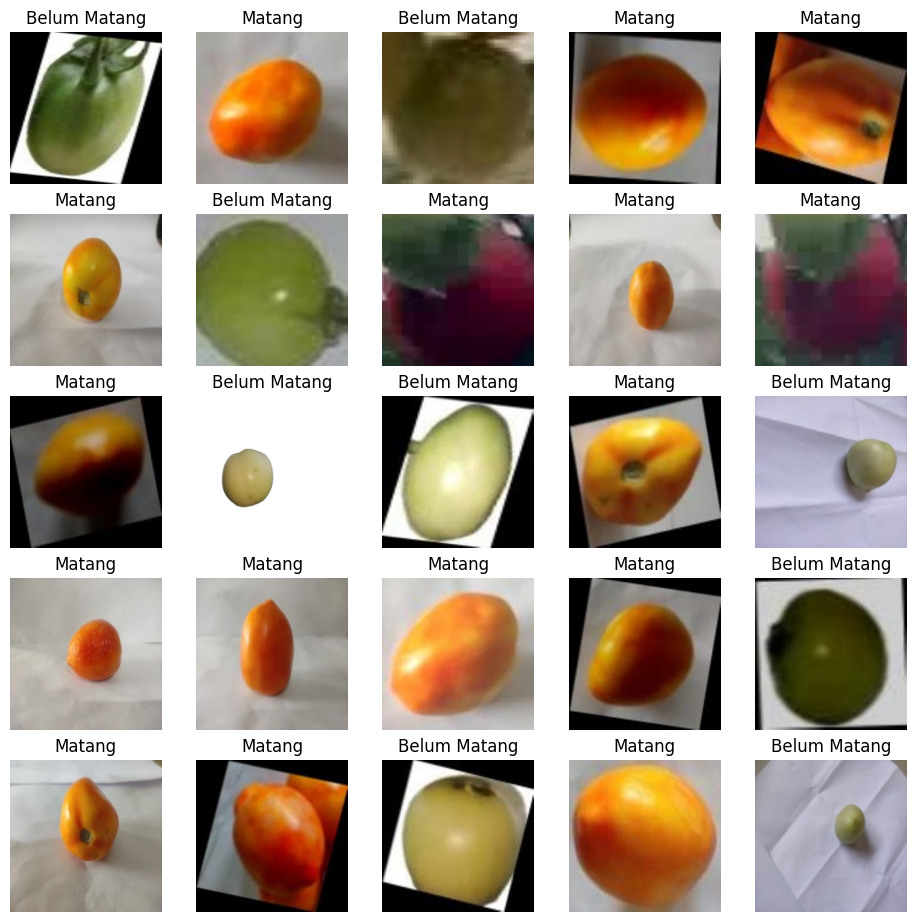

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

nrows = 5
ncols = 5
hspace = 0
wspace = 0
fig, ax = plt.subplots(nrows, ncols, figsize=(10, 10))
fig.subplots_adjust(hspace, wspace)

for i in range(nrows):
    for j in range(ncols):
        temp = i*ncols+j
        ax[i,j].imshow(X_train[temp])
        if y_train[temp] == 0:
            judul = "Matang"
        elif y_train[temp] == 1:
            judul = "Belum Matang"
        ax[i,j].set_title(judul)
        ax[i,j].axis('off')
plt.show()

**1-6. BERSIHKAN USELESS DATA (RAM CLEANER)**

In [ ]:
import gc

del dataTrain
del dataTest
del X_train
del X_test

gc.collect()

64

**1-7. DATA FINAL YANG AKAN DIGUNAKAN**

In [ ]:
print("X_train_norm     :", X_train_norm.shape)
print("y_train_encode   :", y_train_encode.shape)
print("X_test_norm      :", X_test_norm.shape)
print("y_test_encode    :", y_test_encode.shape)

X_train_norm     : (3560, 224, 224, 3)
y_train_encode   : (3560, 2)
X_test_norm      : (397, 224, 224, 3)
y_test_encode    : (397, 2)


**1-7. SAMPEL DATA YANG AKAN DIGUNAKAN**

(Hal ini dilakukan karena jika tidak dilakukan data sampling maka proses training cenderung memakan RAM yang besar)

In [ ]:
from sklearn.model_selection import train_test_split

sampling_fraction = 0.5


X_train_sampled, X_val_sampled, y_train_sampled, y_val_sampled = train_test_split(
    X_train_norm, y_train_encode, test_size=1-sampling_fraction, random_state=42
)

print("Sampled X_train shape     :", X_train_sampled.shape)
print("Sampled y_train shape     :", y_train_sampled.shape)
print("Sampled X_val shape       :", X_val_sampled.shape)
print("Sampled y_val shape       :", y_val_sampled.shape)


Sampled X_train shape     : (1780, 224, 224, 3)
Sampled y_train shape     : (1780, 2)
Sampled X_val shape       : (1780, 224, 224, 3)
Sampled y_val shape       : (1780, 2)


# **2. BANGUN ARSITEKTUR**

**2-1. ARSITEKTUR MOBILENETV2**

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

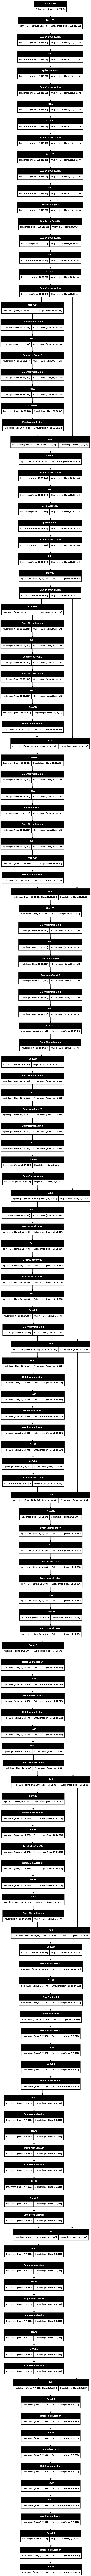

In [ ]:
from keras.applications import MobileNetV2
from keras.utils import plot_model


conv_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size_224p, img_size_224p, 3))
conv_base.trainable = False
conv_base.summary()
plot_model(conv_base, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,210 (9.24 MB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

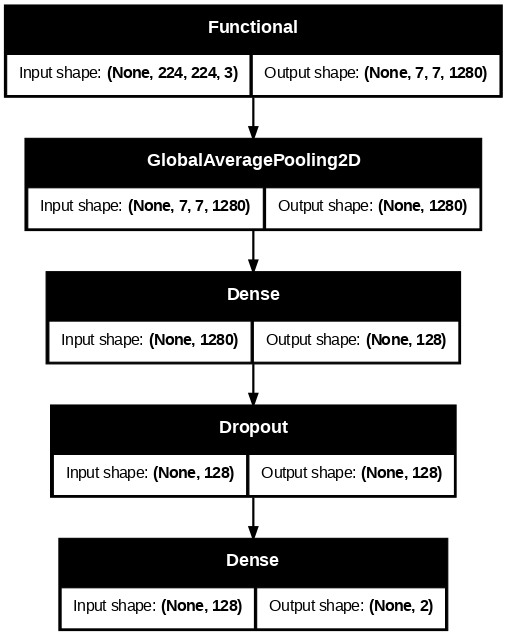

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from keras.optimizers import Adam
import tensorflow as tf

def define_model_mobilenetv2():
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=(224, 224, 3),
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False

    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

if "model" in globals():
  del model
  gc.collect()

model = define_model_mobilenetv2()
model.summary()
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)


# **3. TRAINING DENGAN K-FOLD**

**3-1. TRAINING MODEL DENGAN ARSITEKTUR MOBILENET V2 DENGAN METODE K-FOLD, 2 FOLD**

In [ ]:
os.mkdir("/content/simpan_model")

In [ ]:
%%time

import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit

def evaluate_model(dataX, dataY, n_folds=2):
    epochs = 10
    batch_size = 64

    scores, histories = list(), list()
    kfold = KFold(n_folds, shuffle=True, random_state=1)

    i = 0
    for train_ix, val_ix in kfold.split(dataX):
        i = i+1
        model = define_model_mobilenetv2()
        trainX, trainY, valX, valY = dataX[train_ix], dataY[train_ix], dataX[val_ix], dataY[val_ix]
        history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, validation_data=(valX, valY), verbose=1)
        loss, acc = model.evaluate(valX, valY, verbose=0)
        print('\nAkurasi Fold ke-' + str(i) + ' = %.3f' % (acc * 100.0))
        print('Loss Fold ke-' + str(i) + ' = %.3f' % (loss) + '\n')
        scores.append(acc)
        histories.append(history)

        model.save("/content/simpan_model/model_fold_" + str(i) + ".h5")

        model_csv = pd.DataFrame(history.history)
        csv_file = "/content/simpan_model/model_fold_" + str(i) + ".csv"
        with open(csv_file, mode="w") as f:
          model_csv.to_csv(f)

        del trainX
        del trainY
        del valX
        del valY
        del model
        gc.collect()

    return scores, histories

scores, histories = evaluate_model(X_train_sampled, y_train_sampled)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.7005 - loss: 0.6722 - val_accuracy: 0.9506 - val_loss: 0.1333
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.9479 - loss: 0.1310 - val_accuracy: 0.9708 - val_loss: 0.0876
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.9754 - loss: 0.0544 - val_accuracy: 0.9753 - val_loss: 0.0719
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - accuracy: 0.9862 - loss: 0.0461 - val_accuracy: 0.9719 - val_loss: 0.0695
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - accuracy: 0.9871 - loss: 0.0336 - val_accuracy: 0.9787 - val_loss: 0.0665
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.9951 - loss: 0.0238 - val_accuracy: 0.9775 - val_loss: 0.0565
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.9923 - loss: 0.0226 - val_accuracy: 0.9787 - val_loss: 0.0562
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - accuracy: 0.9794 - loss: 0.0348 - val_accuracy: 0.97


Akurasi Fold ke-1 = 97.528
Loss Fold ke-1 = 0.071

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 17s 831ms/step - accuracy: 0.7199 - loss: 0.6758 - val_accuracy: 0.9730 - val_loss: 0.0951
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - accuracy: 0.9557 - loss: 0.1307 - val_accuracy: 0.9764 - val_loss: 0.0623
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - accuracy: 0.9637 - loss: 0.1074 - val_accuracy: 0.9820 - val_loss: 0.0482
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.9741 - loss: 0.0689 - val_accuracy: 0.9787 - val_loss: 0.0488
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.9890 - loss: 0.0510 - val_accuracy: 0.9809 - val_loss: 0.0481
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - accuracy: 0.9919 - loss: 0.0365 - val_accuracy: 0.9854 - val_loss: 0.0386
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.9885 - loss: 0.0389 - val_accuracy: 0.9865 - val_loss: 0.0379
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/ste


Akurasi Fold ke-2 = 98.539
Loss Fold ke-2 = 0.033

CPU times: user 1min 24s, sys: 24.3 s, total: 1min 49s
Wall time: 1min 56s


**3-2. OPTION 1 : PLOT GRAFIK HASIL TRAINING COMBINE**

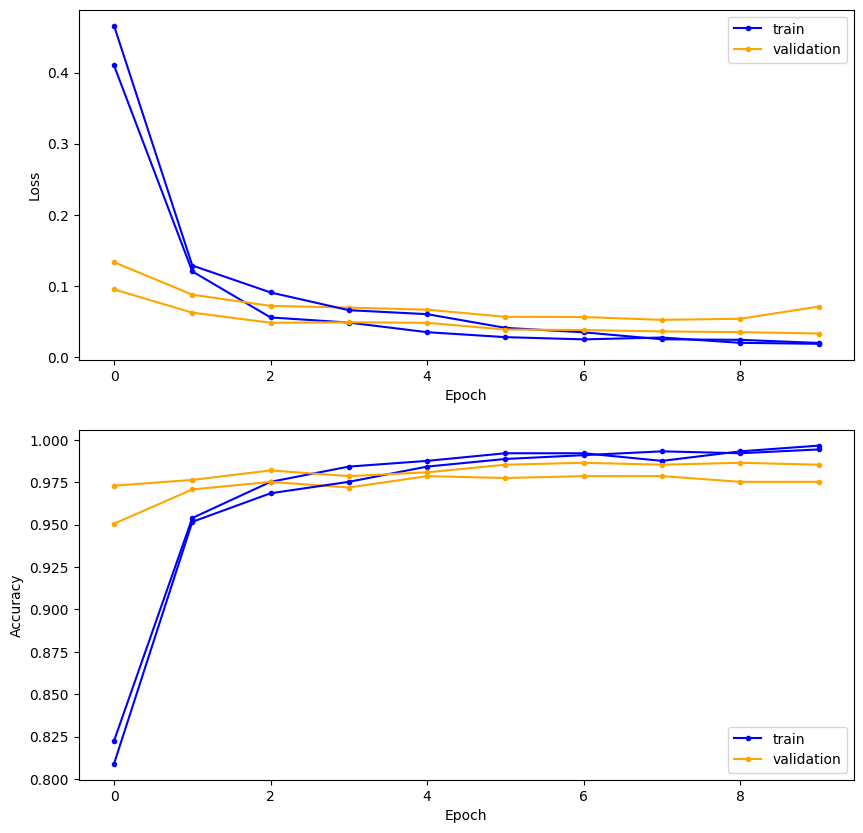

In [ ]:
import warnings
warnings.filterwarnings('ignore')

def summarize_diagnostics_combine(histories):
    plt.figure(figsize=(10, 10))

    for i in range(len(histories)):
        plt.subplot(211)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.plot(histories[i].history['loss'], color='blue', marker='.', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='upper right')

        plt.subplot(212)
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', marker='.', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='lower right')
    plt.show()

summarize_diagnostics_combine(histories)

**3-2. OPTION 2 : PLOT GRAFIK HASIL TRAINING SINGLE**

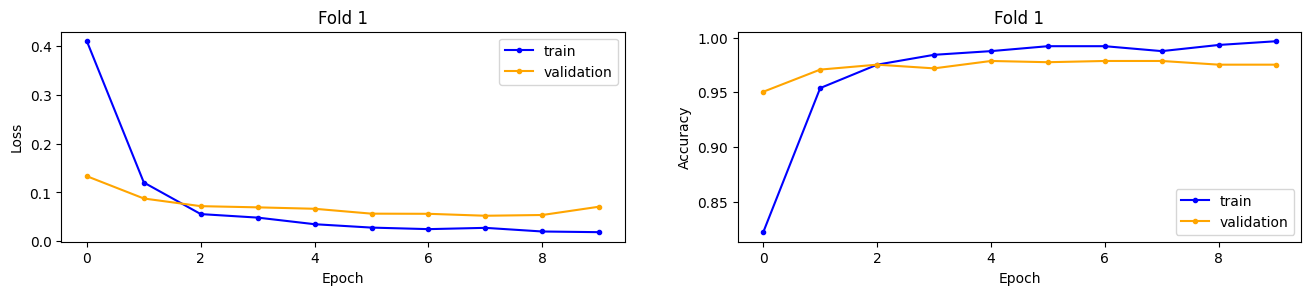

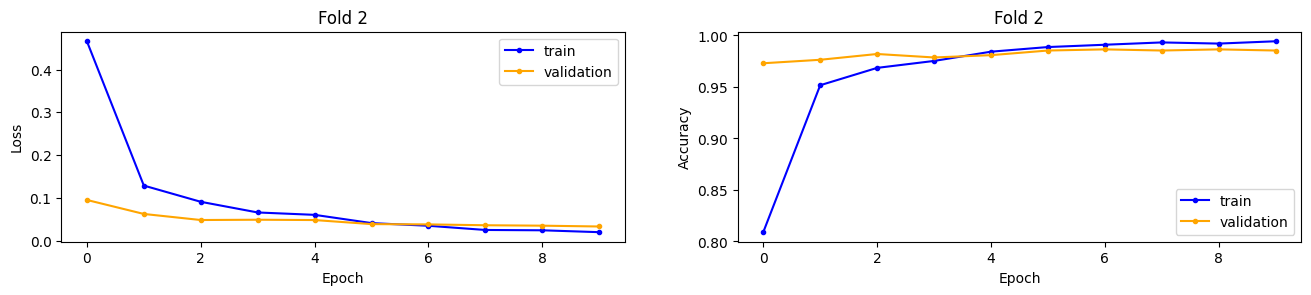

In [ ]:
import warnings
warnings.filterwarnings('ignore')

def summarize_diagnostics_single(histories):
    for i in range(len(histories)):
        plt.figure(figsize=(16, 6))

        plt.subplot(221)
        plt.title('Fold ' + str(i+1))
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.plot(histories[i].history['loss'], color='blue', marker='.', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='upper right')

        plt.subplot(222)
        plt.title('Fold ' + str(i+1))
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', marker='.', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='lower right')
        plt.show()

summarize_diagnostics_single(histories)


**3-3. PLOT SKOR AKHIR (MEAN & STD)**

Accuracy: mean=98.034 std=0.506, n=2


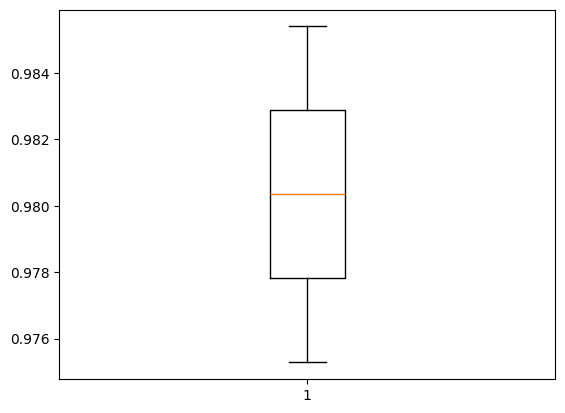

In [ ]:
from numpy import mean
from numpy import std

def summarize_performance(scores):
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    plt.boxplot(scores)
    plt.show()

summarize_performance(scores)

# **4. TESTING MODEL (EVALUASI)**

**4-1. LOAD MODEL YANG DIPILIH**

In [ ]:

if "model" in globals():
  del model
  gc.collect()


from keras.models import load_model
model = load_model('/content/model_fold_1(1).h5')
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,212 (9.24 MB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2 (12.00 B)

**4-2. OPTION 1 : TESTING MODEL DENGAN DATA TEST LAPANGAN**

In [ ]:
from keras.utils import to_categorical
import tensorflow as tf

tf.keras.backend.clear_session()

y_train_encode_new = to_categorical(y_train)
y_test_encode_new = to_categorical(y_test)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

pred = model.predict(X_test_norm.astype('float32'), batch_size=64, verbose=0)
pred_label = np.argmax(pred, axis=-1)
true_label = np.argmax(y_test_encode_new, axis=-1)

print("Label Prediksi   :", pred_label)
print("Label Sebenarnya :", true_label, "\n")

loss, acc = model.evaluate(X_test_norm, y_test_encode_new, verbose=1)
print(f"Loss: {loss:.4f}, Accuracy: {acc:.4f}")

Label Prediksi   : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Label Sebenarnya : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0

**4-3. CONFUSION MATRIX & CLASSIFICATION REPORT**

Accuracy : 95.466%
Loss     : 0.127

Classification Report:

              precision    recall  f1-score   support

        Ripe       0.98      0.94      0.96       220
      Unripe       0.93      0.98      0.95       177

    accuracy                           0.95       397
   macro avg       0.95      0.96      0.95       397
weighted avg       0.96      0.95      0.95       397



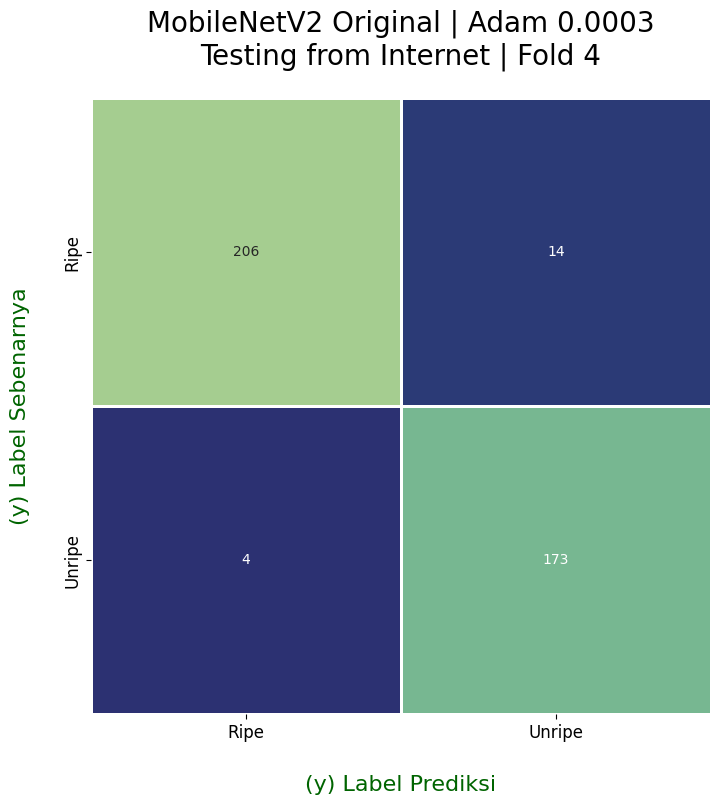

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

target_names = ['Ripe','Unripe']

cmatrix = confusion_matrix(true_label, pred_label)
creport = classification_report(true_label, pred_label, target_names=target_names)

print("Accuracy : {:.3f}%".format(acc * 100))
print("Loss     : {:.3f}".format(loss))
print("\nClassification Report:\n")
print(creport)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cmatrix, cmap="crest_r", annot=True, fmt='.4g', linewidths=2, linecolor='white', cbar=False, ax=ax)

ax.set_title('MobileNetV2 Original | Adam 0.0003\nTesting from Internet | Fold 4', fontsize=20, pad=24)
ax.set_xticklabels(labels=target_names, fontsize=12)
ax.set_yticklabels(labels=target_names, fontsize=12)

plt.xlabel("(y) Label Prediksi", fontsize=16, color="darkgreen", labelpad=24)
plt.ylabel("(y) Label Sebenarnya", fontsize=16, color="darkgreen", labelpad=24)
plt.show()


# **5. Prediksi**

**5-1. UPLOAD DATA BARU**

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
!wget -O 'data_test_baru1.jpg' 'https://upload.wikimedia.org/wikipedia/commons/8/89/Tomato_je.jpg'

--2025-01-02 07:18:25--  https://upload.wikimedia.org/wikipedia/commons/8/89/Tomato_je.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 238015 (232K) [image/jpeg]
Saving to: ‘data_test_baru1.jpg’

data_test_baru1.jpg 100%[===================>] 232.44K  1.48MB/s    in 0.2s    

2025-01-02 07:18:25 (1.48 MB/s) - ‘data_test_baru1.jpg’ saved [238015/238015]



**5-2. BUAT PREDIKSI**

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

img_size_224p = 224

def load_image(filename):
    img = load_img(filename, target_size=(img_size_224p, img_size_224p))
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    img = img_to_array(img)
    img = img.reshape(-1, img_size_224p, img_size_224p, 3)
    img = img.astype('float32')
    img = img / 255.0
    return img

def run_example(new_data_path):
    img = load_image(new_data_path)

    model = load_model('/content/model_fold_1(1).h5')

    predictions = model.predict(img)
    predicted_class = np.argmax(predictions, axis=-1)

    if predicted_class[0] == 0:
        print("\nHasil Prediksi: Matang")
    elif predicted_class[0] == 1:
        print("\nHasil Prediksi: Mentah")
    else:
        print("\nHasil Prediksi: Kategori tidak dikenali")




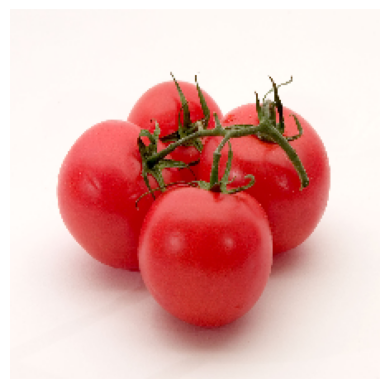

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step

Hasil Prediksi: Matang


In [ ]:
new_data_path = '/content/data_test_baru1.jpg'
run_example(new_data_path)